<a href="https://colab.research.google.com/github/0xmukeshr/Autoannotate/blob/main/auto_annotate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Apr 11 12:23:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install autodistill

In [ ]:
!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
roboflow \
supervision==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.6 MB

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


##iMAGE PREP


In [ ]:
!mkdir {HOME}/images

In [ ]:
import roboflow

roboflow.login(force=True)

dataset=roboflow.download_dataset(dataset_url="#desired public roboflow dataset url", model_format="#model")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.81, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Mini-project-1 in yolov8:: 100%|██████████| 1026/1026 [00:00<00:00, 5874.56it/s]


In [ ]:
%mv {HOME}/food-recog/valid/images/* {HOME}/images

mv: cannot stat '/content/food-recog/valid/images/*': No such file or directory


In [ ]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    "#prompt for image identification":"#class" ,

})

In [ ]:
DATASET_DIR_PATH=f"{HOME}/#dataset path"

In [ ]:
IMAGE_DIR_PATH=f"{HOME}/#image path"

In [ ]:
from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".jpg",
    output_folder=DATASET_DIR_PATH)

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /content/images/0fd0e8821c.jpg:   0%|          | 0/50 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
Labeling /content/images/8bc7e3ba50.jpg: 100%|██████████| 50/50 [02:13<00:00,  2.68s/it]


Labeled dataset created - ready for distillation.


In [ ]:
ANNOTATE_DIR_PATH=f"{HOME}/dataset/train/label/"
IMG_DIR_PATH=f"{HOME}/dataset/train/images/"
DATA_YAML_PATH=f"{HOME}/dataset/data.yaml"

In [ ]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMG_DIR_PATH,
    annotations_directory_path=ANNOTATE_DIR_PATH,
    data_yaml_path=DATA_YAML_PATH
)

len(dataset)

40

In [ ]:
dataset.classes

['adhirasam']

In [ ]:
SAMPLE_SIZE =16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

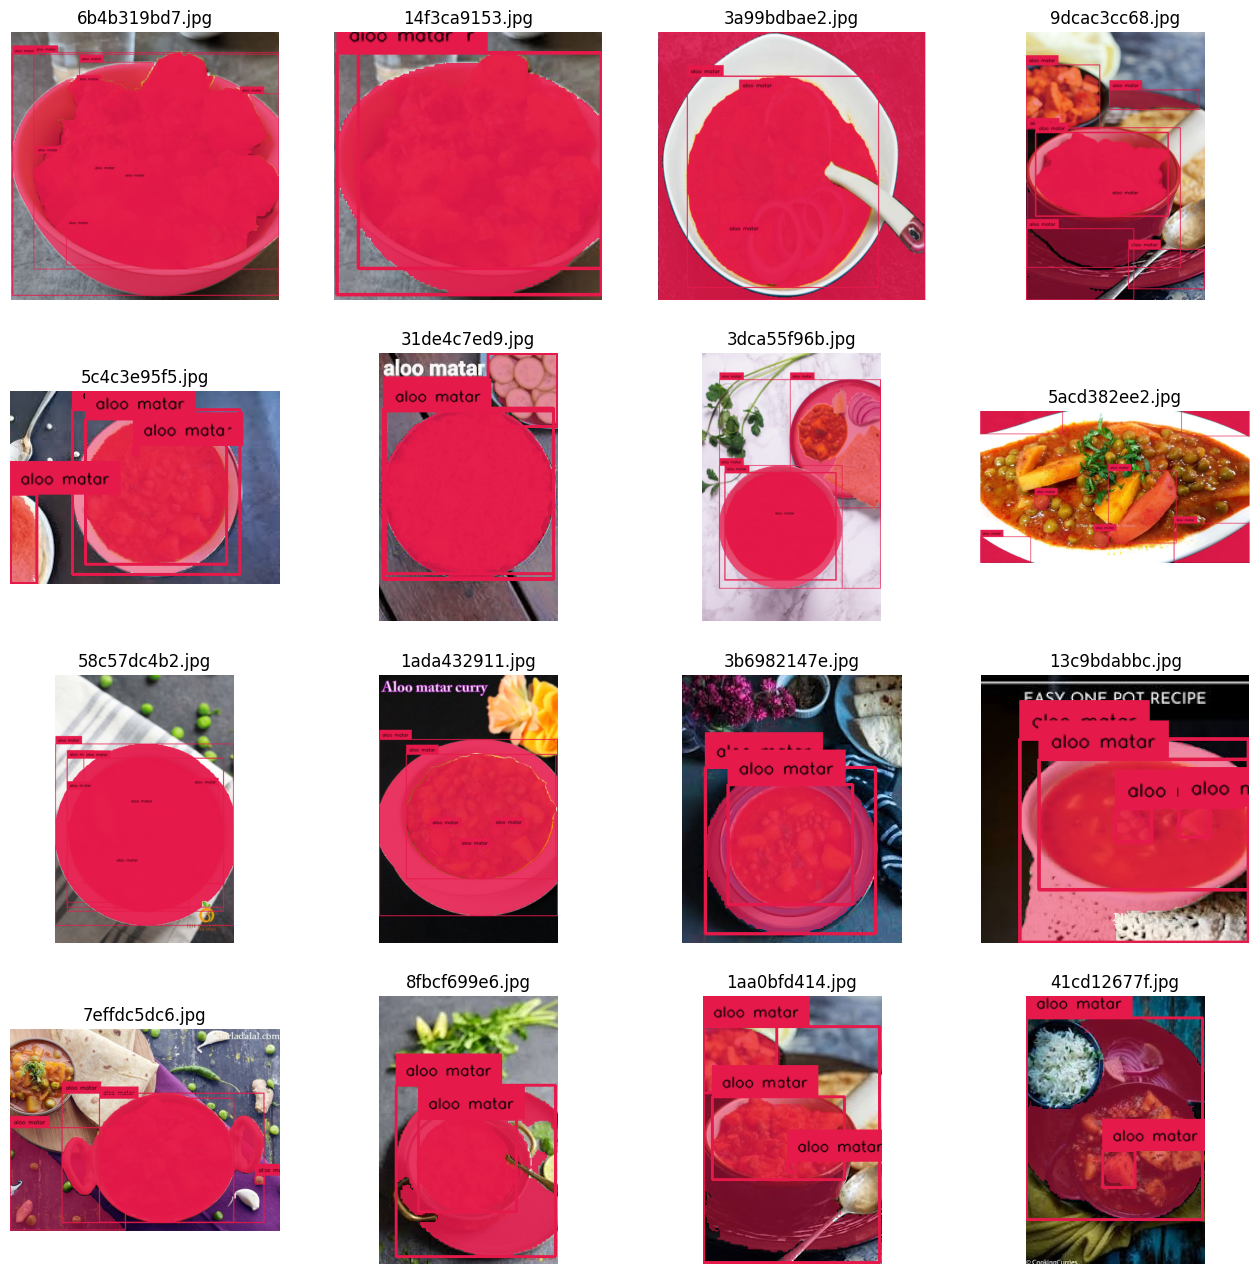

In [ ]:
import supervision as sv

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)


##Deleting folder

In [ ]:
import shutil

# Replace 'folder_to_delete' with the name of the folder you want to delete
folder_to_delete = f"{HOME}/dataset"

shutil.rmtree(folder_to_delete)

print("Folder deleted successfully.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset'

##Making zip file

In [ ]:
import shutil


folder_to_move = f"{HOME}/dataset"

# Replace 'archive_name.zip' with the desired name for the ZIP archive
shutil.make_archive(f'{HOME}/#class', 'zip', folder_to_move)


'/content/adhirasam.zip'

##Downloading file

In [ ]:
from google.colab import files

# Replace 'archive_name.zip' with the name of the ZIP archive created in the previous step
files.download('/content/#class.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##REMOVE ZIP file

In [ ]:
import os

# Replace 'file_to_delete.zip' with the name of the ZIP file you want to delete
file_to_delete = '/content/#class.zip'

# Use os.remove to delete the file
if os.path.exists(file_to_delete):
    os.remove(file_to_delete)
    print("File deleted successfully.")
else:
    print("The file does not exist.")


File deleted successfully.


##remove images

In [ ]:
import os

# Specify the directory containing the images
image_directory = f"{HOME}/images"

# Get a list of all files in the directory
file_list = os.listdir(image_directory)

# Iterate through each file and delete images (assuming '.jpg' and '.png' extensions)
for file_name in file_list:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        file_path = os.path.join(image_directory, file_name)
        os.remove(file_path)
        print(f"Deleted: {file_path}")

print("All images deleted successfully.")


Deleted: /content/images/02d09e872d.jpg
Deleted: /content/images/8f0fce678c.jpg
Deleted: /content/images/6b7aa00d7d.jpg
Deleted: /content/images/9aa8de6d09.jpg
Deleted: /content/images/6b51759dac.jpg
Deleted: /content/images/12b1eb8026.jpg
Deleted: /content/images/7e1919ccbf.jpg
Deleted: /content/images/3a804a31ab.jpg
Deleted: /content/images/14d893495c.jpg
Deleted: /content/images/7d120ae799.jpg
Deleted: /content/images/3d959a621f.jpg
Deleted: /content/images/5b3f7359b7.jpg
Deleted: /content/images/4dc22aeaa4.jpg
Deleted: /content/images/1a9346fd1e.jpg
Deleted: /content/images/02f2e49039.jpg
Deleted: /content/images/7bc5fab65b.jpg
Deleted: /content/images/5f7df33e72.jpg
Deleted: /content/images/9fb6ec6325.jpg
Deleted: /content/images/8e1361fc0a.jpg
Deleted: /content/images/4ba54c8c49.jpg
Deleted: /content/images/0cd70ffc10.jpg
Deleted: /content/images/1fe5414330.jpg
Deleted: /content/images/4df2abf698.jpg
Deleted: /content/images/2f6cc87911.jpg
Deleted: /content/images/13a2cfd13f.jpg
